In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## [Using Confidence Intervals](https://www.inferentialthinking.com/chapters/13/4/Using_Confidence_Intervals) (Inferential Thinking - 13.4)

A confidence interval has a single purpose - **to estimate an unknown parameter based on data in a random sample**. In the last example, we stated that the interval (36%, 42%) was an approximate 95% confidence interval for the percent of smokers among mothers in the population. That was a formal way of saying that by our estimate, the percent of smokers among the mothers in the population was somewhere between 36% and 42%, and that our process of estimation is correct about 95% of the time.

It is important to avoid using confidence interval for other purposes. For example, recall that we calculated the interval (26.9 years, 27.6 years) as an approximate 95% confidence for the average age of mothers in the population. A common misconception is concluding that about 95% of the women were betwee 26.9 to 27.6 years old. This definitely can't be right!

In [2]:
baby = Table.read_table('baby.csv')
baby

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


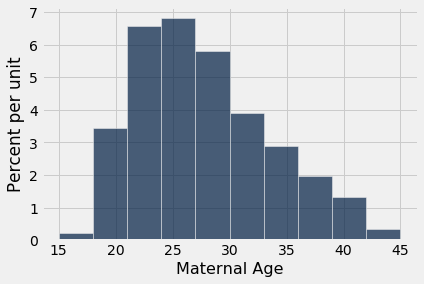

In [3]:
baby.select('Maternal Age').hist()

A small percent of the sampled ages are in the (26.9, 27.6) interval, and you would expect a similar small percent in the population. The interval just estimates one number: the **average** of all the ages in the population.

However, estimating a parameter by confidence interval does have an important use besides just telling us roughly how big the parameter is.

### Using a Confidence Interval to Test Hypotheses
Our approximate 95% confidence interval for the average age in the population goes from 26.9 years to 27.6 years. Suppose we want to test the following hypotheses:

* **Null**: The average age in the population is 30 years.
* **Alternative**: The average age in the population is not 30 years.

If we were using the 5% cutoff for the P-value, we would reject the null hypothesis. This is because 30 is not in the 95% confidence interval for the population average. At the 5% level of significance, 30 is not a plausible value for the population average.

This use of confidence interval is the result of a **duality** between confidence intervals and tests: if we are testing whether or not the population mean is a particular value `x`, and we use the 5% cutoff for the P-value, then you will reject the null hypothesis if `x` is not in your 95% confidence interval for the mean.

This can be established by statistical theory. In practice, it involves just checking whether or not the value specified in the null hypothesis lies in the confidence interval.

If we were using the 1% cutoff for the P-value, we would have to check if the value specified in the null hypothesis lies in a 99% confidence interval for the population mean.

To a rough approximations, these statements are also true for population proportions, provided that the sample is large.

While we have a way of using confidence intervals to test a particular kind of hypothesis, we might wonder about the value of testing whether or not the average age in a population is equal to 30, since the value isn't clear. However, there are some situations in which a test of this kind of hypothesis is both natural and useful.

Here we are going to study data that are a subset of information gathered in a randomized controlled trial about treatments for Hodgkin's disease. 
* Hodgkin's disease is a cancer that typically affects young people
* The disease is curable but the treatment can be very harsh
* The purpose of the trial was to come up with dosage that would cure the cancer but minimize the adverse effects on the patients

The table `hodgkins` contains data on the effect the treatment had on the lungs of 22 patients. The columns are as follows:

* Height in cm
* A measure of radiation to the mantle
* A measure of chemotherapy
* A score of the health of the lungs at baseline (at the start of the treatment)
    * Higher scores correspond to more healthy lungs
* A score of the health of the lungs, 15 months after treatment

In [4]:
hodgkins = Table.read_table('hodgkins.csv')
hodgkins

height,rad,chemo,base,month15
164,679,180,160.57,87.77
168,311,180,98.24,67.62
173,388,239,129.04,133.33
157,370,168,85.41,81.28
160,468,151,67.94,79.26
170,341,96,150.51,80.97
163,453,134,129.88,69.24
175,529,264,87.45,56.48
185,392,240,149.84,106.99
178,479,216,92.24,73.43


We will compare the baseline and the 15-month scores. Each row corresponds to one patient, and thus the baseline scores and the 15-month scores for each row are paired. 

At a glance, the 15-months scores appear to be lower than the baseline scores - the sampled patients' lungs seems to be doing worse 15 months after the treatment.

In [5]:
hodgkins = hodgkins.with_column(
'drop', hodgkins.column('base') - hodgkins.column('month15'))
hodgkins

height,rad,chemo,base,month15,drop
164,679,180,160.57,87.77,72.8
168,311,180,98.24,67.62,30.62
173,388,239,129.04,133.33,-4.29
157,370,168,85.41,81.28,4.13
160,468,151,67.94,79.26,-11.32
170,341,96,150.51,80.97,69.54
163,453,134,129.88,69.24,60.64
175,529,264,87.45,56.48,30.97
185,392,240,149.84,106.99,42.85
178,479,216,92.24,73.43,18.81


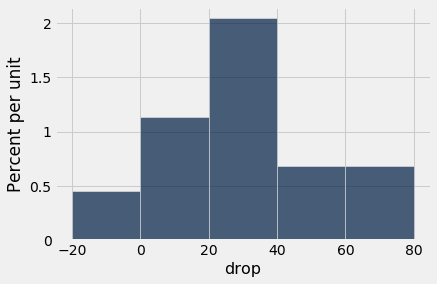

In [6]:
hodgkins.select('drop').hist(bins = np.arange(-20, 81, 20))

In [7]:
# Calculate the average drop
np.mean(hodgkins.column('drop'))

28.615909090909096

* Could this be the result of chance variation?
    * It doesn't seem so, but the data are from a random sample
* Could it be that in the entire population of patients, the average drop is just 0?

To analyze this, we can set up 2 hypotheses:
* **Null**: In the population, the average drop is 0
* **Alternative**: In the population, the average drop is not 0

To test this hypothesis with a 1% cutoff for the P-value, construct an approximate 99% confidence interval for the average drop in the population.

In [ ]:
def bootstrap_mean(original_sample, label, replications):
    """ Returns an array of bootstrapped sample means.
    original_sample: table containing the original sample
    label: column label containing the values
    replications: number of repetitions done"""
    
    column = original_sample.select(label)
    means = make_array()
    for i in np.arange(replications):
        bootstrap_sample = column.sample()
        resampled_mean = np.mean(bootstrap_sample.column(0))
        